In [98]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [35]:
data = pd.read_csv('insurance.csv')

In [36]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [38]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


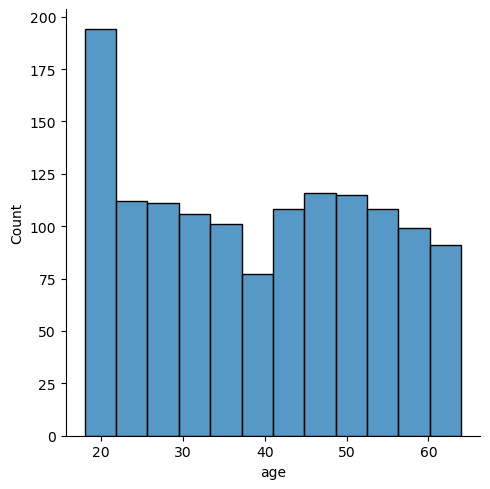

In [39]:
sns.displot(x=data.age)

<Axes: xlabel='sex', ylabel='count'>

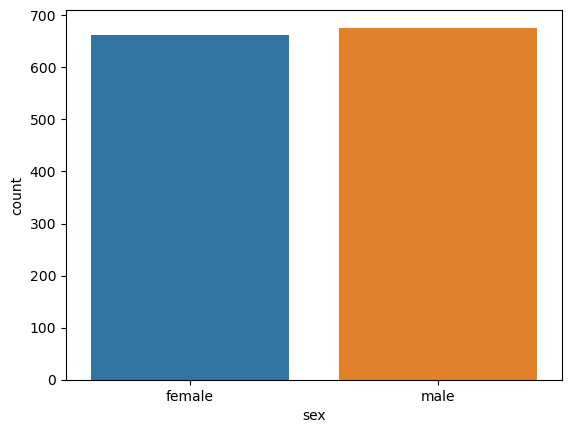

In [40]:
sns.countplot(x=data.sex)

<Axes: xlabel='smoker', ylabel='count'>

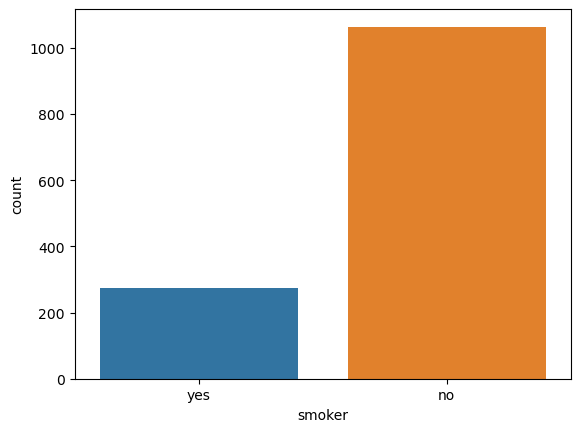

In [41]:
sns.countplot(x=data.smoker)

<Axes: xlabel='region', ylabel='count'>

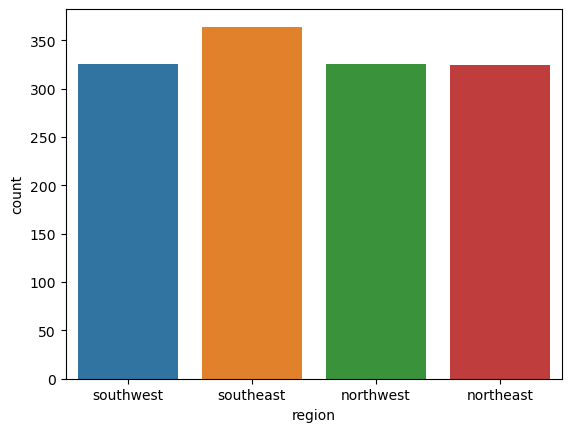

In [42]:
sns.countplot(x=data.region)

In [68]:
data.replace({'sex':{'male':1,'female':0},
              'smoker':{'yes':1,'no':0},
              'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}} , inplace=True)

In [69]:
x = data.drop(columns='charges',axis=1)
y = data['charges']

In [70]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       1
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       3
4      32    1  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       3
1334   18    0  31.920         0       0       4
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       1
1337   61    0  29.070         0       1       3

[1338 rows x 6 columns]


In [115]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [116]:
model = RandomForestRegressor()

In [117]:
model.fit(xtrain,ytrain)

RandomForestRegressor()

In [118]:
predictions = model.predict(xtest)

In [119]:
mae = mean_absolute_error(ytest,predictions)
r2 = r2_score(predictions,ytest)
print(mae,r2)

2646.711300860199 0.8645792308106797


<Axes: ylabel='charges'>

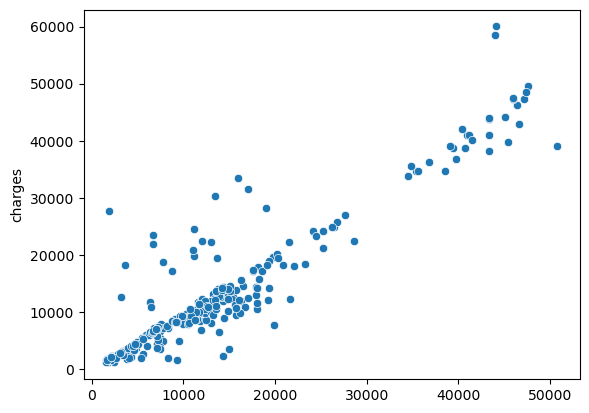

In [109]:
sns.scatterplot(x=predictions,y=ytest)